## Implementing the Recommendation System

### Content-Based Filtering

In a content-based filtering system, recommendations are made by comparing the content (features) of items. For images, feature extraction can be done using techniques like Convolutional Neural Networks (CNNs).

Here’s a step-by-step approach to implement a content-based recommendation system:<Br>

Feature Extraction: Use a pre-trained CNN model to extract features from the product images.<Br>
>Here used pre-trained CNN (e.g., VGG16) to extract features from the images.<br>
Similarity Calculation: Compute the similarity between the selected product's features and all other products' features.<br>
Recommendation: Recommend products with the highest similarity scores.<br>

In [1]:
import numpy as np
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.preprocessing import image
from keras.models import Model

# Load the VGG16 model pre-trained on ImageNet
base_model = VGG16(weights='imagenet')
model = Model(inputs=base_model.input, outputs=base_model.get_layer('fc1').output)

def extract_features(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_data = image.img_to_array(img)
    img_data = np.expand_dims(img_data, axis=0)
    img_data = preprocess_input(img_data)
    features = model.predict(img_data)
    return features.flatten()


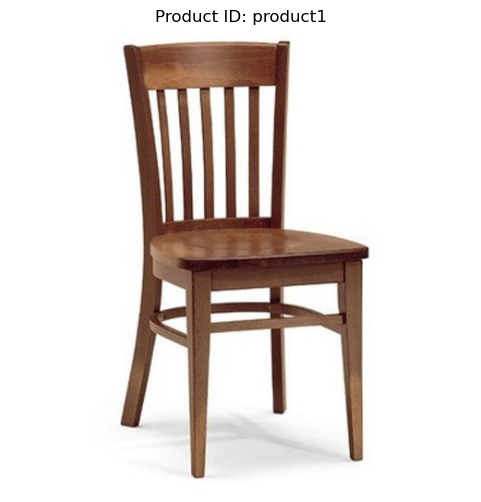

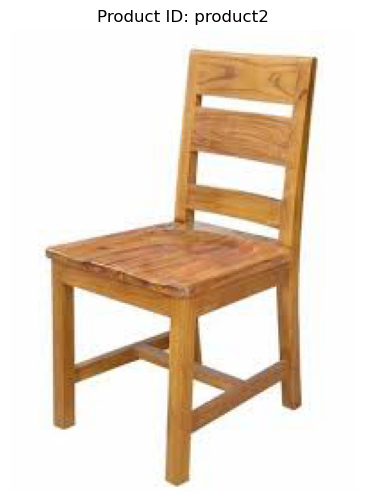

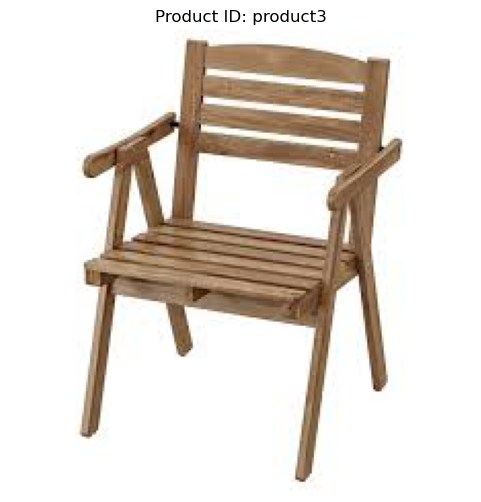

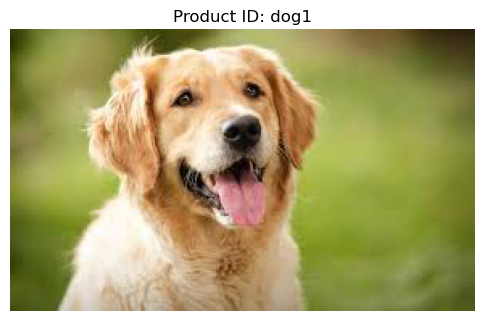

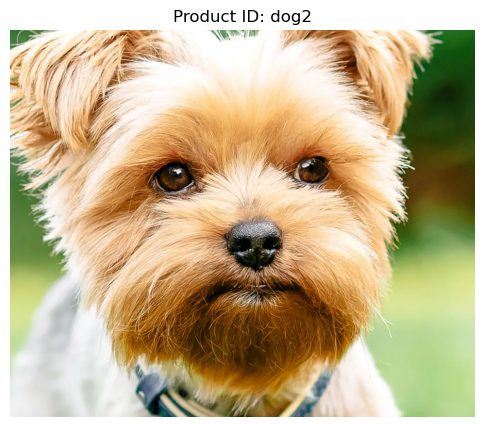

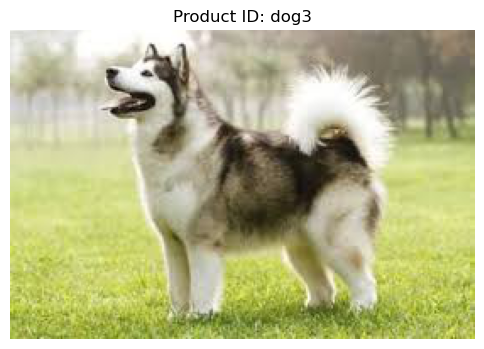

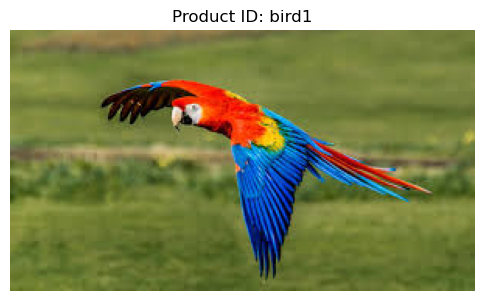

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 508ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 313ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 317ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step


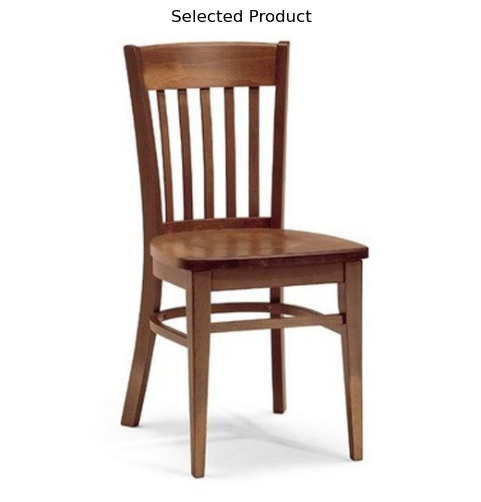

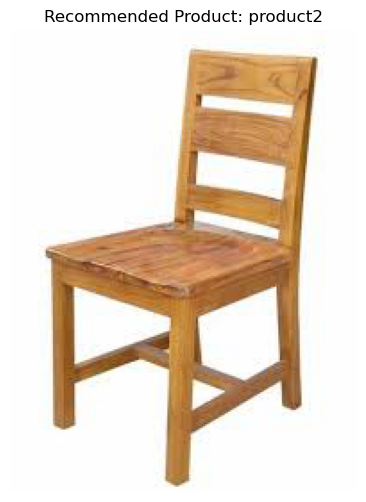

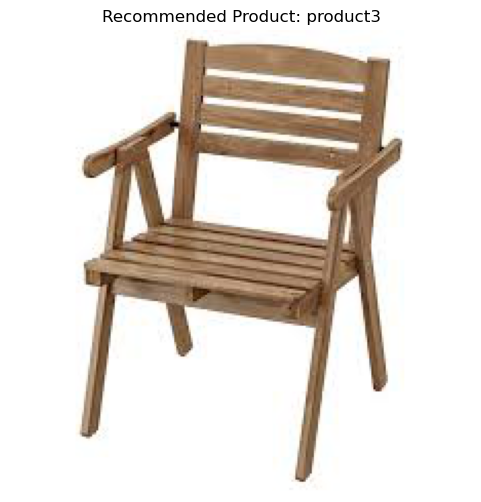

In [4]:
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.preprocessing import image
from keras.models import Model
import numpy as np

# Load the VGG16 model pre-trained on ImageNet
base_model = VGG16(weights='imagenet')
model = Model(inputs=base_model.input, outputs=base_model.get_layer('fc1').output)

def extract_features(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_data = image.img_to_array(img)
    img_data = np.expand_dims(img_data, axis=0)
    img_data = preprocess_input(img_data)
    features = model.predict(img_data)
    return features.flatten()

# Example image paths and categories
image_paths = {
    'product1': 'C1.JPG',
    'product2': 'C2.JPG',
    'product3': 'C3.JPG',
    'dog1': 'P4.JPEG',
    'dog2': 'P5.JPG',
    'dog3': 'P6.JPEG',
    'bird1':'P8.JPEG',
}

categories = {
    'product1': 'furniture',
    'product2': 'furniture',
    'product3': 'furniture',
    'dog1': 'animal',
    'dog2': 'animal',
    'dog3': 'animal',
    'bird1': 'bird',
}

# Function to display a single image
def display_image(image_path, title="Image"):
    img = mpimg.imread(image_path)
    plt.figure(figsize=(6, 6))
    plt.imshow(img)
    plt.title(title)
    plt.axis('off')
    plt.show()

# Function to display all images
def display_all_images(image_paths):
    for product_id, path in image_paths.items():
        display_image(path, f'Product ID: {product_id}')

# Example usage to display all images
display_all_images(image_paths)

# Extract features
features_dict = {product_id: extract_features(path) for product_id, path in image_paths.items()}

def get_similar_products(selected_product_id, features_dict, categories, top_n=5):
    selected_product_features = features_dict[selected_product_id].reshape(1, -1)
    selected_category = categories[selected_product_id]
    similarities = {}
    for product_id, features in features_dict.items():
        if product_id != selected_product_id and categories[product_id] == selected_category:
            similarity = cosine_similarity(selected_product_features, features.reshape(1, -1))
            similarities[product_id] = similarity[0][0]
    sorted_products = sorted(similarities.items(), key=lambda x: x[1], reverse=True)
    return sorted_products[:top_n]

# Function to display recommendations
def display_recommendations(selected_product_id, features_dict, image_paths, categories, top_n=5):
    similar_products = get_similar_products(selected_product_id, features_dict, categories, top_n)
    
    # Display the selected product
    display_image(image_paths[selected_product_id], 'Selected Product')
    
    # Display the recommended products
    for product_id, _ in similar_products:
        display_image(image_paths[product_id], f'Recommended Product: {product_id}')

# Example usage
display_recommendations('product1', features_dict, image_paths, categories)
